In [1]:
import logging
import os

import matplotlib.pyplot as plt

import numpy as np

from data.data_preparer import DataPreparer
from src.data.data_reader import DataReader
from tools.profiles_manager import ProfilesManager

logging.basicConfig(level=logging.INFO)

while str(os.getcwd())[-3:] != 'src':  # Execute from src-directory root
    os.chdir('..')

In [2]:
# TODO: uitzoeken of dit eventueel kan gedaan worden met nieuwe API voor data
(businesses, reviews, users), _ = DataReader().read_data(no_train_test=True)
user_profiles = ProfilesManager().get_user_profiles()
business_profiles = ProfilesManager().get_business_profiles()
input_ml_train, input_ml_test, output_ml_train, output_ml_test = DataPreparer.get_train_test_validate_old(businesses, reviews, users, user_profiles, business_profiles)

In [3]:
input_correlation = input_ml_test.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(input_correlation, dtype=bool))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 1.3000e+01, 2.0000e+01, 2.3000e+01, 8.5000e+01,
        1.7000e+02, 4.1400e+02, 1.0800e+03, 5.2050e+03, 6.4757e+04,
        5.2141e+04, 1.9629e+04, 2.4697e+04, 2.0513e+04, 1.0877e+04,
        4.8680e+03, 2.0800e+03, 8.4900e+02, 3.5000e+02, 1.0100e+02,
        9.6000e+01, 6.9000e+01, 5.4000e+01, 6.1000e+01, 8.5000e+01,
        3.4000e+01, 1.6000e+01, 1.9000e+01, 4.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56

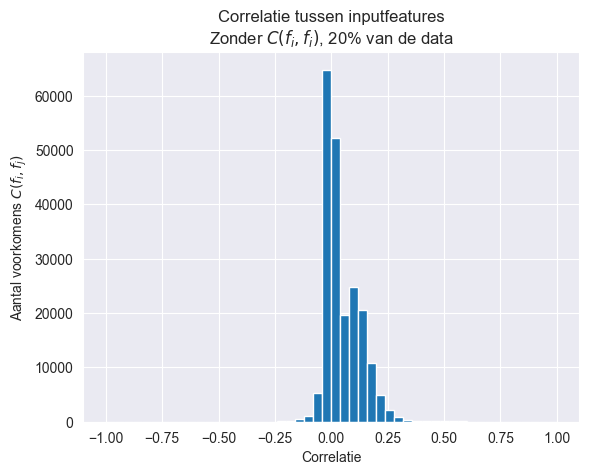

In [109]:
data = input_correlation.where(~mask).to_numpy().flatten()
data = data[~np.isnan(data)]
data = sorted(
    data.tolist()
)

plt_data = plt.subplots(1, 1)
fig2: plt.Figure = plt_data[0]
ax2: plt.Axes = plt_data[1]

ax2.set_title("Correlatie tussen inputfeatures\n" + r"Zonder $C(f_i, f_i)$, 20% van de data")
ax2.set_xlabel("Correlatie")
ax2.set_ylabel(r"Aantal voorkomens $C(f_i, f_j)$")
ax2.hist(data, bins=50, range=(-1, 1))

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        5.0000e+00, 1.3000e+01, 2.0000e+01, 2.3000e+01, 8.5000e+01,
        1.7000e+02, 4.1400e+02, 1.0800e+03, 5.2050e+03, 6.4757e+04,
        5.2141e+04, 1.9629e+04, 2.4697e+04, 2.0513e+04, 1.0877e+04,
        4.8680e+03, 2.0800e+03, 8.4900e+02, 3.5000e+02, 1.0100e+02,
        9.6000e+01, 6.9000e+01, 5.4000e+01, 6.1000e+01, 8.5000e+01,
        3.4000e+01, 1.6000e+01, 1.9000e+01, 4.0000e+00, 5.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56

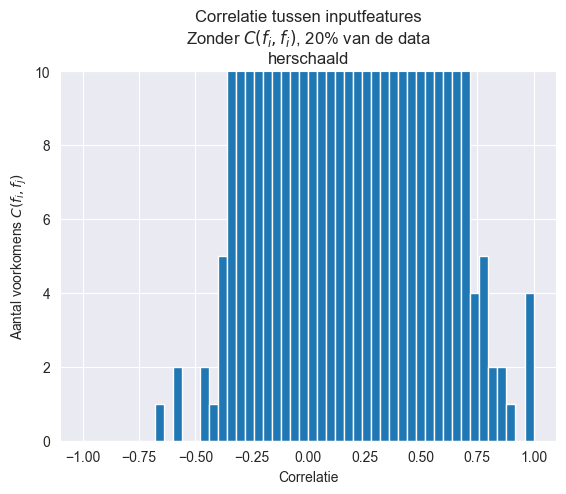

In [110]:
plt_data2 = plt.subplots(1, 1)
fig3: plt.Figure = plt_data2[0]
ax3: plt.Axes = plt_data2[1]

ax3.set_title("Correlatie tussen inputfeatures\n" + r"Zonder $C(f_i, f_i)$, 20% van de data" + "\nherschaald")
ax3.set_xlabel("Correlatie")
ax3.set_ylabel(r"Aantal voorkomens $C(f_i, f_j)$")
ax3.set_ylim(0, 10)
ax3.hist(data, bins=50, range=(-1, 1))

In [112]:
for index, data in input_correlation.where(~mask).iterrows():
    for column in data.index:
        if abs(data[column]) > 0.75:
            if index.startswith("user_"):
                if column != index[5:]:
                    print(f"{index} - {column}")
            elif column.startswith("user_"):
                if index != column[5:]:
                    print(f"{index} - {column}")

user_compliments - user_fans
user_positive_interactions - user_fans
user_positive_interactions - user_compliments
user_category_nightlife - user_category_bars
user_category_beer - user_category_wine_&_spirits
